In [4]:
import glob
import os
import nltk
import pickle
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import pandas as pd
from nltk.tokenize import word_tokenize
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

C:\Users\Harini\Anaconda3\lib\site-packages\nltk\decorators.py:68: DeprecationWarning: `formatargspec` is deprecated since Python 3.5. Use `signature` and the `Signature` object directly
  regargs, varargs, varkwargs, defaults, formatvalue=lambda value: ""


In [5]:
results = []
saveLocation = 'C:\\Users\\Harini\\Documents\\GitHub\\Podknow\\data\\transcripts\\scrubbed'
for folderName,subfolders,fileName in os.walk('C:\\Users\\Harini\\Documents\\GitHub\\Podknow\\data\\transcripts\\scrubbed'):
    for file in fileName:
        if  str(file.endswith(".txt_scrubbed")):
            f = open(os.path.join(folderName,file),'rb')
            data = pickle.load(f)
            #removing alpha numeric and other unnecessary words using stop_words
            data = [word for word in data if word.isalpha()]
            stop_words = ['I','me','said','know','like','fucking','\'s','\'re','\'m', 'n\'t','think','feel','got','get','say','people','see','going']
            data = [w for w in data if not w in stop_words]
            
            value0, value1, value2,value3,*extraWords = file.split('_')
            value4 = data
            rows = (value0,value1,value2,value3,value4)
            results.append(rows)
            
            
labels = ['ID','Name','Date','topicName','scrubbedtext']
PodKnow_Data = pd.DataFrame.from_records(results, columns= labels)

            

In [21]:
PodKnow_Data.head()


ID                                               Name  \
0  1012570406                                    TheMFCEOProject   
1  1028908750                                        HiddenBrain   
2  1039708229                                      BrownAmbition   
3  1042368254                            TheHerdwithColinCowherd   
4  1043699613  Saints-Rams, Succession's Brilliance, Team USA...   

                            Date  \
0                September112019   
1                September162019   
2                September182019   
3                September142019   
4   The Bill Simmons Podcast.txt   

                                           topicName  \
0  OvercomingTheFearsThatKeepUsOrdinarywithAndyFr...   
1                                WereAllGonnaDie.txt   
2                   Ep189TiffanysGoalforTheBig40.txt   
3                                  Blazing5Week2.txt   
4                                           scrubbed   

                                        scrubbedtext  
0  [stack, hundreds, roof, stop, reach, family, w...  
1  [NPR, This, hidden, brain, Shankar, vedantam, ...  
2  [hey, qween, season, right, throw, things, ity...  
3  [Starbucks, Nitro, cold, copy, music, workouts...  
4  [today, special, episode, Thursday, rolling, r...

In [7]:
#import modules
import os.path
from gensim import corpora
from gensim.models import LsiModel
from gensim.models import LdaModel
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt

C:\Users\Harini\Anaconda3\lib\site-packages\socks.py:58: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Callable
C:\Users\Harini\Anaconda3\lib\site-packages\scipy\sparse\sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


In [8]:
def prepare_corpus(doc_clean):
    # Creating the term dictionary of our courpus, where every unique term is assigned an index. dictionary = corpora.Dictionary(doc_clean)
    dictionary = corpora.Dictionary(doc_clean)
    # Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
    doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
    # generate LDA model
    return dictionary,doc_term_matrix

In [14]:
prepare_corpus(PodKnow_Data['scrubbedtext'])

(<gensim.corpora.dictionary.Dictionary at 0x258bb5f5588>,
 [[(0, 1),
   (1, 1),
   (2, 1),
   (3, 1),
   (4, 1),
   (5, 1),
   (6, 4),
   (7, 1),
   (8, 1),
   (9, 1),
   (10, 1),
   (11, 1),
   (12, 1),
   (13, 2),
   (14, 1),
   (15, 1),
   (16, 3),
   (17, 1),
   (18, 1),
   (19, 1),
   (20, 1),
   (21, 1),
   (22, 1),
   (23, 1),
   (24, 1),
   (25, 1),
   (26, 1),
   (27, 1),
   (28, 1),
   (29, 1),
   (30, 1),
   (31, 1),
   (32, 1),
   (33, 6),
   (34, 1),
   (35, 1),
   (36, 1),
   (37, 1),
   (38, 1),
   (39, 1),
   (40, 1),
   (41, 3),
   (42, 1),
   (43, 1),
   (44, 1),
   (45, 1),
   (46, 1),
   (47, 2),
   (48, 1),
   (49, 1),
   (50, 1),
   (51, 1),
   (52, 1),
   (53, 1),
   (54, 1),
   (55, 2),
   (56, 1),
   (57, 1),
   (58, 1),
   (59, 1),
   (60, 1),
   (61, 1),
   (62, 1),
   (63, 2),
   (64, 1),
   (65, 1),
   (66, 1),
   (67, 1),
   (68, 1),
   (69, 1),
   (70, 1),
   (71, 1),
   (72, 1),
   (73, 1),
   (74, 1),
   (75, 1),
   (76, 1),
   (77, 1),
   (78, 1),
   (

In [9]:
def create_gensim_lsa_model(doc_clean,number_of_topics,words):
    dictionary,doc_term_matrix=prepare_corpus(doc_clean)
    # generate LSA model
    lsamodel = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary)  # train model
    print(lsamodel.print_topics(num_topics=number_of_topics, num_words=words))
    return lsamodel

In [10]:
def compute_coherence_values(dictionary, doc_term_matrix, doc_clean, stop, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, stop, step):
        # generate LSA model
        model = LsiModel(doc_term_matrix, num_topics, id2word = dictionary)  # train model
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=doc_clean, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values


In [11]:
def plot_graph(doc_clean,start, stop, step):
    dictionary,doc_term_matrix=prepare_corpus(doc_clean)
    model_list, coherence_values = compute_coherence_values(dictionary, doc_term_matrix,doc_clean,stop, start, step)
    # Show graph
    x = range(start, stop, step)
    plt.plot(x, coherence_values)
    plt.xlabel("Number of Topics")
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc='best')
    plt.show()

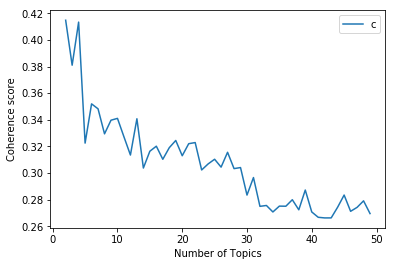

In [15]:
start,stop,step=2,50,1
plot_graph(PodKnow_Data['scrubbedtext'],start,stop,step)

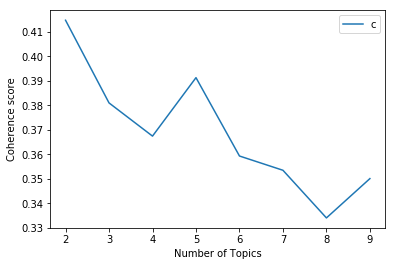

In [17]:
start,stop,step=2,10,1
plot_graph(PodKnow_Data['scrubbedtext'],start,stop,step)

In [24]:
#choosing number of topics to be 5 , as it has a good coherence value compared to the rest of the values.
#We see that the LSA model gives redundant topics.

model=create_gensim_lsa_model(PodKnow_Data['scrubbedtext'],5,30)

[(0, '0.243*"right" + 0.229*"one" + 0.214*"really" + 0.205*"would" + 0.189*"yeah" + 0.184*"go" + 0.178*"want" + 0.166*"time" + 0.146*"way" + 0.127*"thing" + 0.126*"something" + 0.121*"could" + 0.119*"back" + 0.114*"things" + 0.114*"kind" + 0.110*"good" + 0.110*"make" + 0.109*"even" + 0.108*"lot" + 0.104*"mean" + 0.101*"first" + 0.099*"little" + 0.094*"also" + 0.089*"much" + 0.089*"cuz" + 0.089*"us" + 0.085*"well" + 0.083*"okay" + 0.083*"let" + 0.082*"actually"'), (1, '-0.526*"yeah" + 0.362*"Japanese" + 0.280*"war" + 0.165*"way" + 0.133*"world" + 0.121*"quote" + -0.112*"okay" + -0.110*"oh" + 0.107*"United" + 0.105*"States" + 0.104*"things" + 0.103*"Japan" + -0.100*"shit" + 0.094*"Roosevelt" + -0.087*"really" + 0.086*"sort" + 0.083*"War" + 0.082*"Chinese" + 0.081*"one" + 0.081*"would" + -0.081*"right" + 0.073*"history" + -0.071*"na" + 0.071*"China" + -0.070*"gon" + 0.069*"time" + -0.068*"fuck" + -0.067*"guys" + -0.066*"love" + -0.065*"dude"'), (2, '-0.638*"yeah" + -0.326*"Japanese" + -0.